<div style="width:100%; margin-left:auto; margin-right:auto;">
    <img src=mackenzie_logo.png style="height:70px; float:left; margin-top:0px;"/>
    <img src=intel_logo.png style="height:70px; float:right; margin-top:0px;"/>
</div>

<div style="margin-top:120px;">
    <h1 style="text-align:center;">Human Resources Analytics: A Descriptive Analysis</h1>
</div>

<div style="width:100%; margin-top:30px;">

</div>


## Exploratory Data Analysis (EDA)

              Variables   |  Descriptions
    __________________________________________________________________
    
    satisfaction_level    |  Satisfaction Level
    last_evaluation       |  Last evaluation
    number_project        |  Number of projects
    average_montly_hours  |  Average monthly hours
    time_spend_company    |  Time spent at the company
    Work_accident         |  Whether they have had a work accident
    left                  |  Whether the employee has left
    promotion_last_5years |  Whether had a promotion in the last 5 years
    sales                 |  Departments (column sales)
    salary                |  Salary

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('/content/HR_comma_sep.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
data.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
6533,0.87,0.58,3,140,3,1,0,0,support,medium
10370,0.98,0.89,5,181,3,0,0,0,product_mng,low
11671,0.71,0.93,5,140,8,0,0,0,marketing,medium
9105,0.83,0.78,5,250,2,1,0,0,sales,low
5469,0.88,0.90,4,248,2,0,0,0,support,medium
7857,0.36,0.63,2,278,4,0,0,0,RandD,low
8834,0.98,0.83,5,211,3,0,0,0,support,medium
14320,0.40,0.49,2,155,3,0,1,0,hr,medium
7684,0.32,0.55,4,167,5,0,0,0,support,medium
12725,0.43,0.46,2,149,3,0,1,0,technical,medium


In [ ]:
# RENAME column sale to department
data.rename(columns={'sales': 'department'}, inplace = True)

# Convert salary variable type to numeric
data['salary'] = data['salary'].map({'low':1, 'medium':2, 'high':3})

## Descripitve Analysis

 By using this method in Human Resource dataset important insights is possible to see:
* That approximately 24% os the employees left the company.
* The satisfaction level is around 62% and performance is around 72%.
* Employees work in average on 4 projects with 200 hours worked per month.


In [ ]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,1.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,2.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
print(data['department'].value_counts()) # how many employees work in each department

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64


In [ ]:
print(data['salary'].value_counts()) # How many employees per salary range?

1    7316
2    6446
3    1237
Name: salary, dtype: int64


In [ ]:
table = data.pivot_table(values="satisfaction_level", index="department", columns="salary",aggfunc=np.count_nonzero)
table # How many employees per salary range and department?

salary,1,2,3
department,,,
IT,609,535,83
RandD,364,372,51
accounting,358,335,74
hr,335,359,45
management,180,225,225
marketing,402,376,80
product_mng,451,383,68
sales,2099,1772,269
support,1146,942,141


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

import seaborn as sns

sns.set()

#### Boxplot



/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


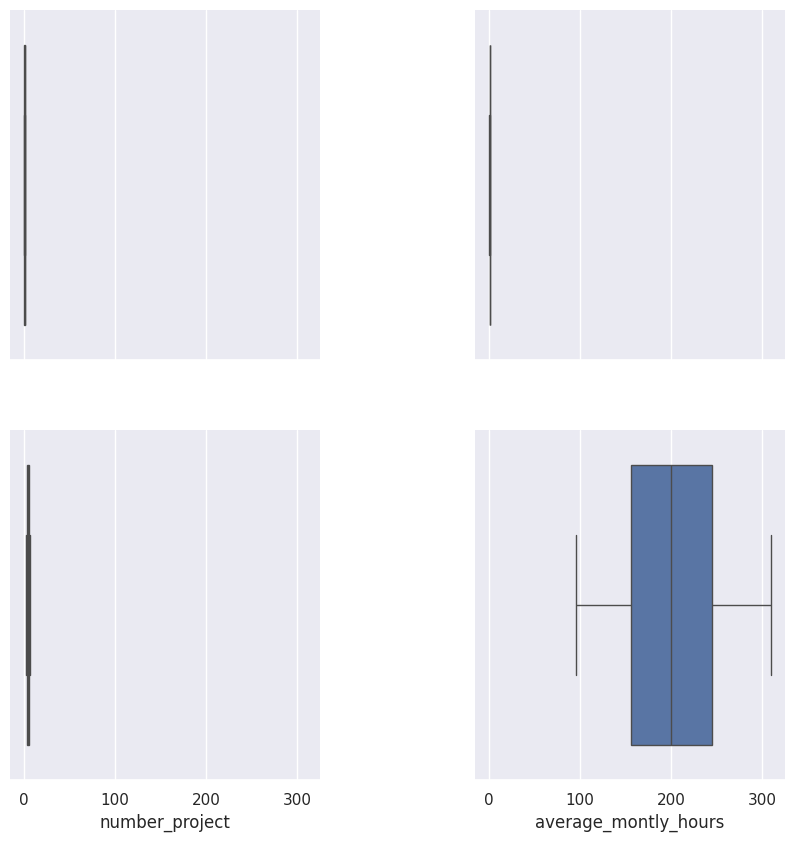

In [ ]:
f, axes = plt.subplots(2,2, figsize=(10,10), sharex=True)

plt.subplots_adjust(wspace=0.5)# adjust the space between the plots

sns.despine(left=True)

# plot a boxplot of satisfaction_level to see if there is outliers
sns.boxplot( x= 'satisfaction_level',  data=data, orient='v',ax=axes[0,0])

# plot a boxplot of last_evaluation to see if there is outliers
sns.boxplot( x= 'last_evaluation',  data=data, orient='v',ax=axes[0,1])

# plot a boxplot of number_project to see if there is outliers
sns.boxplot( x= 'number_project',  data=data, orient='v',ax=axes[1,0])

# plot a boxplot of average_montly_hours to see if there is outliers
sns.boxplot( x= 'average_montly_hours',  data=data, orient='v',ax=axes[1,1]);

#Put a ; at the end of the last line to suppress the printing of output

In the boxplots below it is possibel to see that only time_spend_company has outliers. Let's explain what kind of information is possible to conclude:

* The employees with more time in the company have 10 years, so is possible to say that is a relatively young company.
* Most of the employees have between 3 or 4 years in the company.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


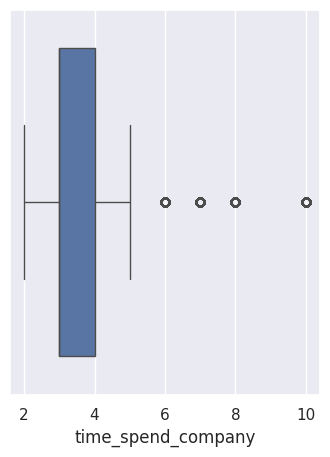

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot( x= 'time_spend_company',  data=data, orient='v');

### Correlation Analysis

In the heat map is possible to see:

* Negative correlation of (-0.39) between satisfaction_level and the employees that left the company.
* The highest positive correlation is between number of projects and average monthly hours (0.42).
* Last_evaluation is high correlated to number_project(0.35)and average_monthly_hours(0.34).
* Work_accident have a low negative correlation(-0.15)and salary (-0.16) with employees that left.

In [ ]:
corr = data.corr()
corr

<ipython-input-14-df690e1cacaf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.098119
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,1.000000


<ipython-input-15-7d21e719ac06>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


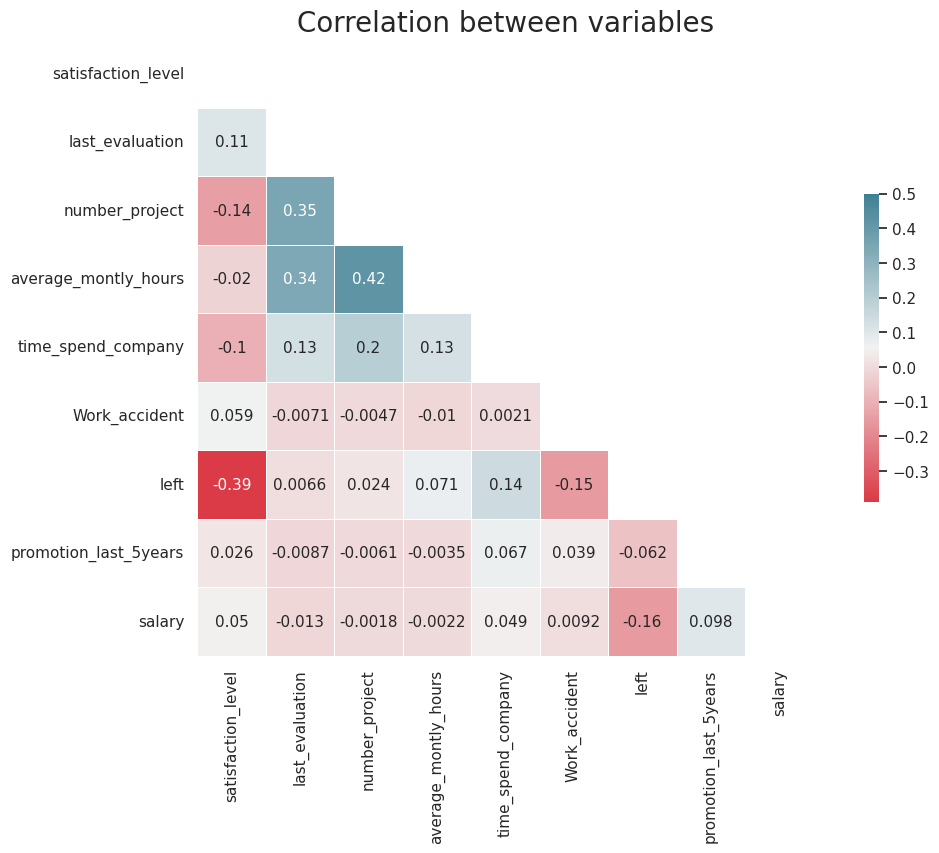

In [ ]:
sns.set(style='white')

mask = np.zeros_like(corr, dtype=np.bool)

mask[np.triu_indices_from(mask)] = True

# Inserir a figura
f, ax = plt.subplots(figsize=(13,8))

cmap = sns.diverging_palette(10,220, as_cmap=True)

#Desenhar o heatmap com a máscara
ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax= .5, annot=True, annot_kws= {'size':11}, square=True, xticklabels=True, yticklabels=True, linewidths=.5,
           cbar_kws={'shrink': .5}, ax=ax)
ax.set_title('Correlation between variables', fontsize=20);


#Hypothesis

In [ ]:
print(data['left'].value_counts()[1],"employees left the company") # How many employees left the company?

3571 employees left the company


### First Hypothesis

The first hypothesis is that salary is the reason why the employees left the company.

In [ ]:
plt.figure(figsize=(4,5))
ax = sns.countplot(data.left)
total = float(len(data))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2%}'.format(height / total),  # Format as percentage
            ha="center")
plt.title('Stayed or Left', fontsize=14)

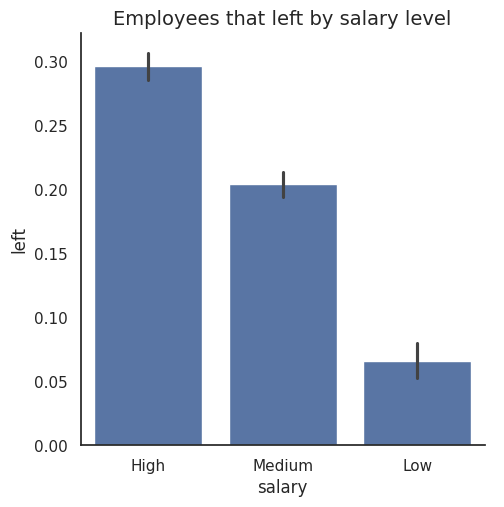

In [ ]:
j = sns.catplot(x='salary', y='left', kind='bar', data=data)
plt.title('Employees that left by salary level', fontsize=14)
j.set_xticklabels(['High', 'Medium', 'Low'])
plt.show()


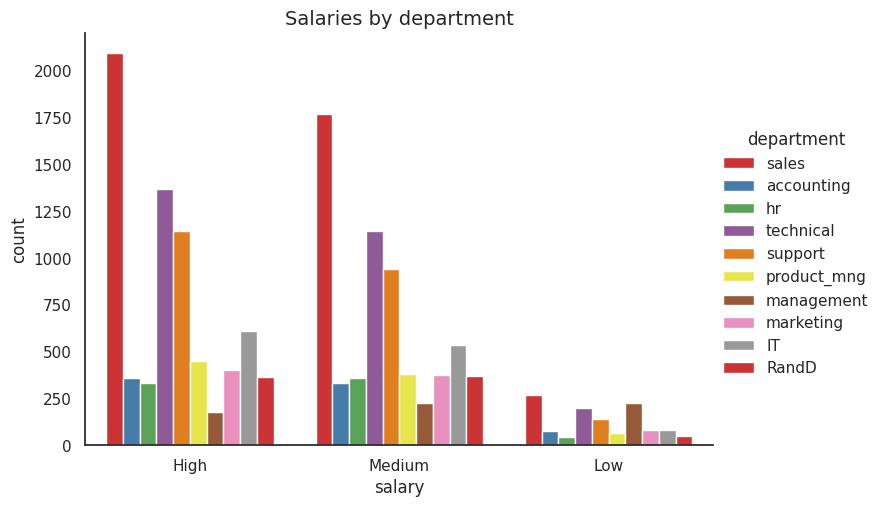

In [ ]:
h = sns.catplot(x='salary', hue='department', kind='count', height=5, aspect=1.5, data=data, palette='Set1')
plt.title("Salaries by department", fontsize=14)
h.set_xticklabels(['High', 'Medium', 'Low'])
plt.show()  # Make sure to add this line to display the plot


In the graphic(Salary Comparison):

   * The manangement department has the biggest difference between the salary of the employees who stayed and those that left.
   * It's not possible to see a huge difference in other departments.
    
The first hypothesis looks very weak to be the main reason why the employees left the company.   

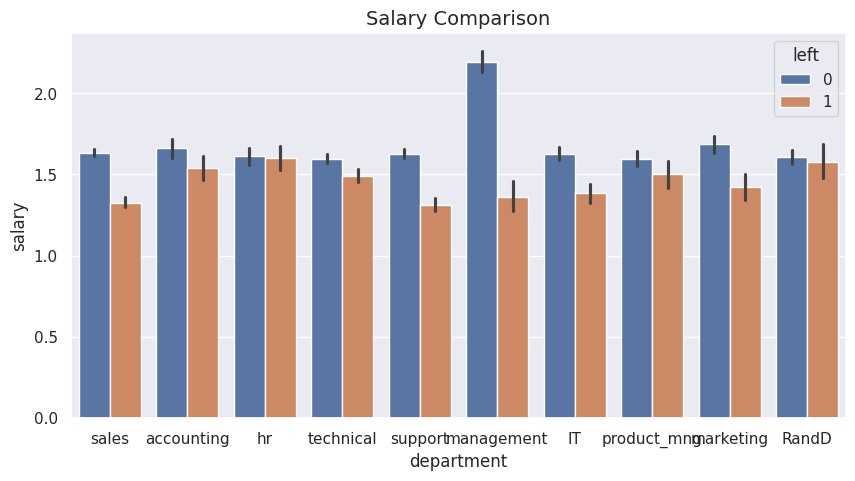

In [ ]:
sns.set()
plt.figure(figsize=(10,5))
sns.barplot(x='department', y='salary', hue='left', data=data)
plt.title('Salary Comparison', fontsize=14);

### Second Hypothesis

The second hypothesis is: employees leave the company because work is not safe.

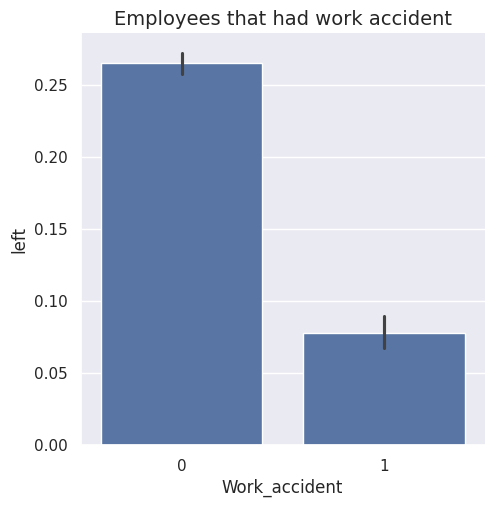

In [ ]:
sns.catplot(x='Work_accident', y='left', kind='bar', data=data)
plt.title('Employees that had work accident', fontsize=14)
plt.show()


About 14% of the employees had a work accident, although of the high number only of accidents only 169 employees data left the company had work a accident. Then this hypothesis is discarded.

In [ ]:
print(data.Work_accident.sum())
print(data.Work_accident.mean())
print((data[data['left']==1]['Work_accident']).sum())

2169
0.1446096406427095
169


### Third Hypothesis

Is this company a good place to grow professionally?

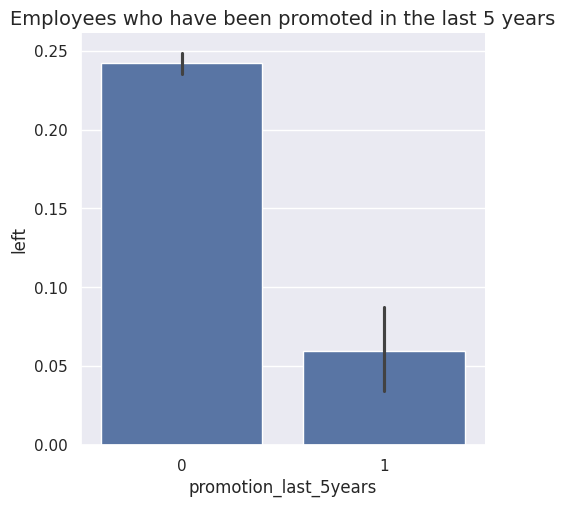

In [ ]:
sns.catplot(x='promotion_last_5years', y='left', kind='bar', data=data)
plt.title('Employees who have been promoted in the last 5 years', fontsize=14);

In the last five years only 319 employees had promotion, this is equivalent to 2% of all employees.
This may be a problem because if it is difficult to get promoted many employees become unmotivated and start looking for a new job.

In [ ]:
print(data.promotion_last_5years.sum())
print(data.promotion_last_5years.mean())

319
0.021268084538969265


**Years in the company**

In the graphic 'Years in the company' we can identify an important characteristic.

* Employees with 7 or more years didn't left, maybe because with the passing of the years they are more confortable and not so interested in look for a new challenge in other company.
* The problem starts when the employees have more than 3 years and get worst when they achieve 5 years.
* It is too early to say that the difficult to get promoted is the main reason for the leaving of the employees, but more research is needed.

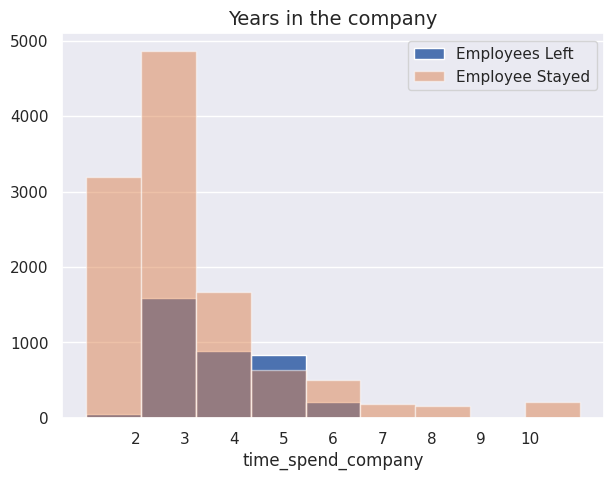

In [ ]:
plt.figure(figsize =(7,5))
bins = np.linspace(1.0, 11,10)
plt.hist(data[data['left']==1]['time_spend_company'], bins=bins, alpha=1, label='Employees Left')
plt.hist(data[data['left']==0]['time_spend_company'], bins=bins, alpha = 0.5, label = 'Employee Stayed')
plt.grid(axis='x')
plt.xticks(np.arange(2,11))
plt.xlabel('time_spend_company')
plt.title('Years in the company', fontsize=14)
plt.legend(loc='best');

### Performance Analysis

There are 2 distincts groups of employees. A group with poor performance and other with high performance employees.
It's natural that employees that don't work well leave the company, but the main problem is that the high performance employees is leaving too and it's necessary to understand why.

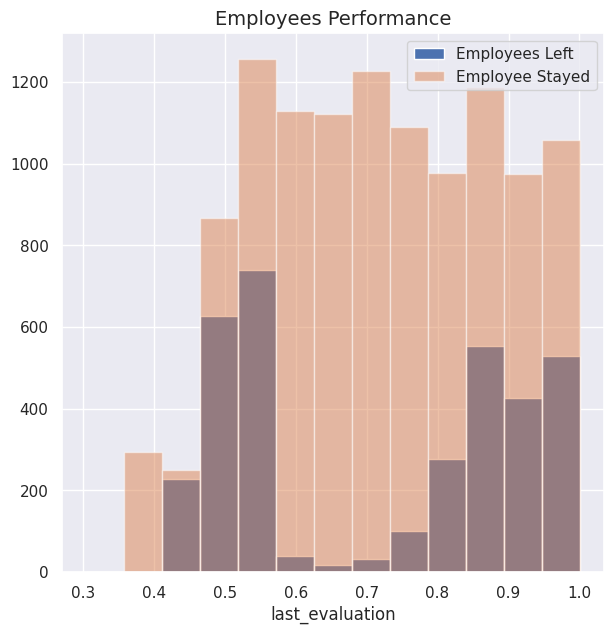

In [ ]:
plt.figure(figsize =(7,7))
bins = np.linspace(0.305, 1.0001, 14)
plt.hist(data[data['left']==1]['last_evaluation'], bins=bins, alpha=1, label='Employees Left')
plt.hist(data[data['left']==0]['last_evaluation'], bins=bins, alpha = 0.5, label = 'Employee Stayed')
plt.title('Employees Performance', fontsize=14)
plt.xlabel('last_evaluation')
plt.legend(loc='best');

It is possible to see that 98% of employees with few projects that left also have poor performance.

And 95% of the employees with 5 or more projects that left the company had the highest performance.

3 or 4 are the best number of projects.

poor_performance_left: 1531
poor_performance_stayed: 36


high_performance_left: 47
high_performance_stayed 889


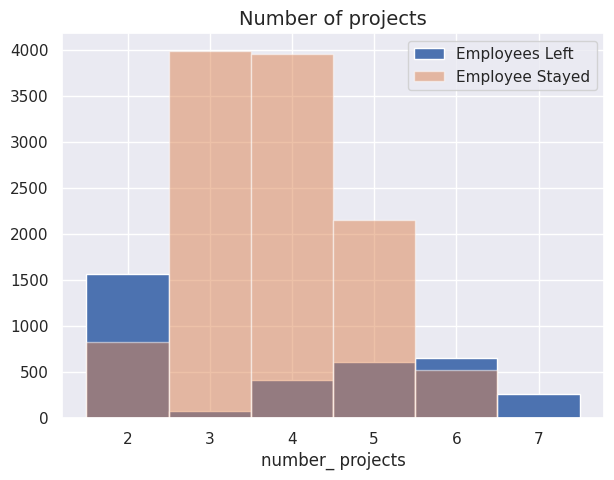

In [ ]:
poor_performance_left = data[(data.last_evaluation <= 0.62) & (data.number_project == 2) & (data.left == 1)]
print('poor_performance_left:',len(poor_performance_left))

poor_performance_stayed = data[(data.last_evaluation > 0.62) & (data.number_project == 2) & (data.left == 1)]
print('poor_performance_stayed:',len(poor_performance_stayed))

print('\n')

high_performance_left= data[(data.last_evaluation <= 0.62) & (data.number_project >=5) & (data.left == 1)]
high_performance_stayed= data[(data.last_evaluation > 0.8) & (data.number_project >=5) & (data.left == 0)]
print('high_performance_left:',len(high_performance_left))
print('high_performance_stayed', len(high_performance_stayed))

plt.figure(figsize =(7,5))
bins = np.linspace(1.5,7.5, 7)
plt.hist(data[data['left']==1]['number_project'], bins=bins, alpha=1, label='Employees Left')
plt.hist(data[data['left']==0]['number_project'], bins=bins, alpha = 0.5, label = 'Employee Stayed')
plt.title('Number of projects', fontsize=14)
plt.xlabel('number_ projects')
plt.legend(loc='best');

### Working hours

Again, there are 2 groups of employees. A group that works fewer hours and another that works more hours compared to the average hours worked.

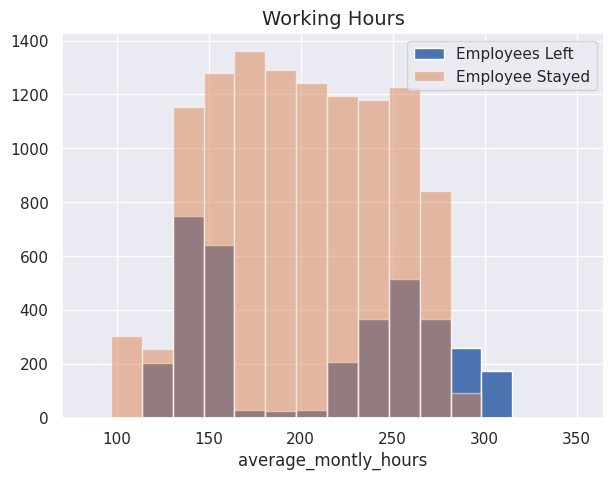

In [ ]:
plt.figure(figsize =(7,5))
bins = np.linspace(80,315, 15)
plt.hist(data[data['left']==1]['average_montly_hours'], bins=bins, alpha=1, label='Employees Left')
plt.hist(data[data['left']==0]['average_montly_hours'], bins=bins, alpha = 0.5, label = 'Employee Stayed')
plt.title('Working Hours', fontsize=14)
plt.xlabel('average_montly_hours')
plt.xlim((70,365))
plt.legend(loc='best');

Clearly is possible to see that the employees with 6 projects or more, work on average 20% more hours.

<ipython-input-36-c2474cb78464>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupby_number_projects = data.groupby('number_project').mean()


number_project
2    160.342546
3    197.507522
4    205.122108
5    212.061572
6    238.694208
7    276.078125
Name: average_montly_hours, dtype: float64


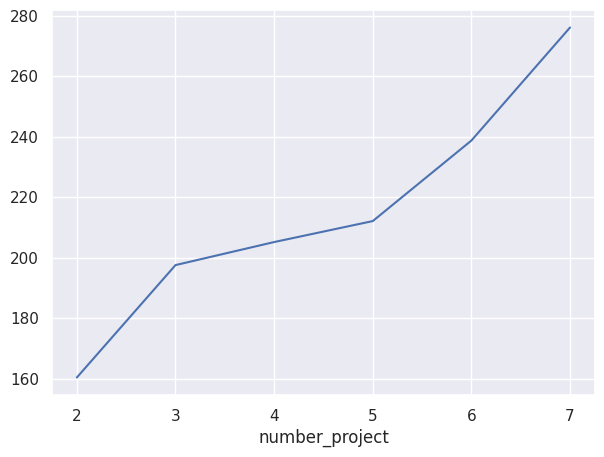

In [ ]:
groupby_number_projects = data.groupby('number_project').mean()
groupby_number_projects = groupby_number_projects['average_montly_hours']
print(groupby_number_projects)
plt.figure(figsize=(7,5))
groupby_number_projects.plot();

With the information above the employees that left the company are grouped as:

* Employees with 2 projects and worked less than the average of the company.
* Employees with 5 or more projects that worked at least 20% more than the average.

In [ ]:
work_less_hours_left = data[(data.average_montly_hours < 200) & (data.number_project == 2) & (data.left == 1)]
print('work_less_hours_left:',len(work_less_hours_left))

work_more_hours_left = data[(data.average_montly_hours > 240) & (data.number_project >=5 ) & (data.left == 1)]
print('work_more_hours_left:',len(work_more_hours_left))

#<p><font color="red">Aqui você fala sobre a relação entre horas de trabalho e quantidade de projetos, mas isso não é exibido no gráfico</font></p>

work_less_hours_left: 1535
work_more_hours_left: 1225


### Satisfaction Level

It is possible to see 3 interesting peaks in the satisfaction levels of the employees that left the company.

* We have a peak of employees who are totally disappointed.
* Another peak  at 0.4, representing another group with the satisfaction level below the average.
* And another amount in the range 0.7 and 0.9, with employees that left, although the high satisfaction.

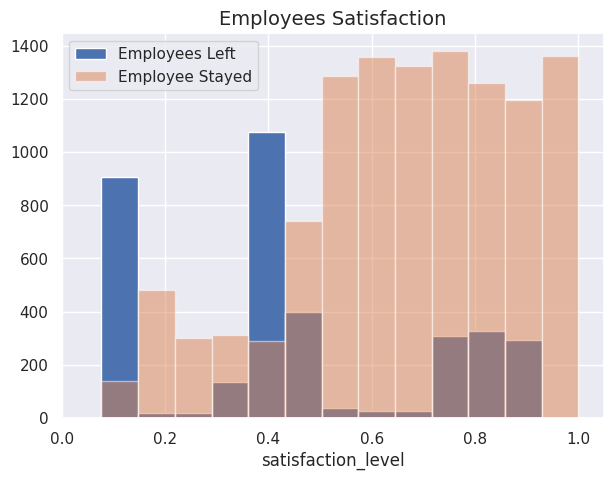

In [ ]:
plt.figure(figsize =(7,5))
bins = np.linspace(0.006,1.000, 15)
plt.hist(data[data['left']==1]['satisfaction_level'], bins=bins, alpha=1, label='Employees Left')
plt.hist(data[data['left']==0]['satisfaction_level'], bins=bins, alpha = 0.5, label = 'Employee Stayed')
plt.title('Employees Satisfaction', fontsize=14)
plt.xlabel('satisfaction_level')
plt.xlim((0,1.05))
plt.legend(loc='best');

#### Average satisfaction for years in the company

In [ ]:
groupby_time_spend = data.groupby('time_spend_company').mean()
groupby_time_spend['satisfaction_level']

<ipython-input-39-9a11a16718b2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupby_time_spend = data.groupby('time_spend_company').mean()


time_spend_company
2     0.697078
3     0.626314
4     0.467517
5     0.610305
6     0.603440
7     0.635957
8     0.665062
10    0.655327
Name: satisfaction_level, dtype: float64

#### When the employees becames unsatisfayed?

In next results it is clear the drop in satisfaction when employees are working on 6 or more projects.

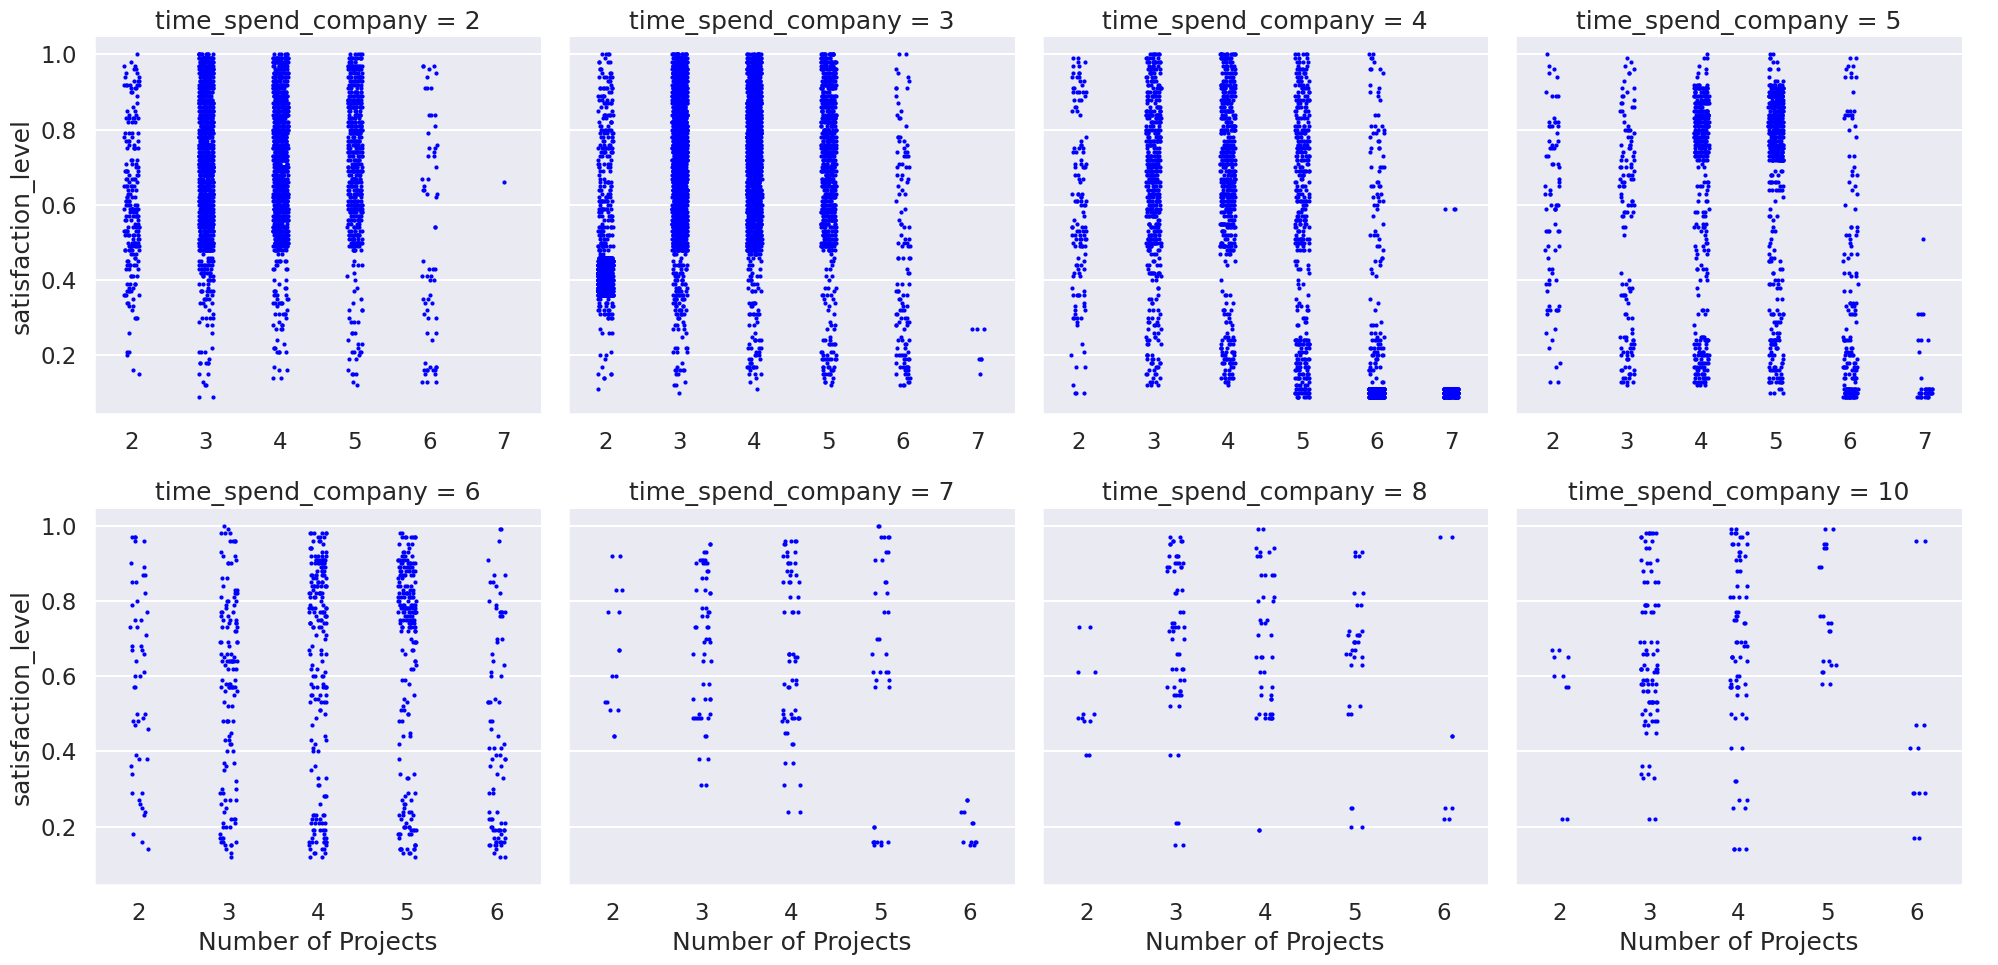

In [ ]:
sns.set()
sns.set_context("talk")
ax = sns.catplot(x="number_project", y="satisfaction_level", col="time_spend_company",col_wrap=4, size=3, color='blue',sharex=False, data=data)
ax.set_xlabels('Number of Projects');

<ipython-input-42-22e6b28acd12>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr2 = func_living.corr()
<ipython-input-42-22e6b28acd12>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr2, dtype=np.bool)


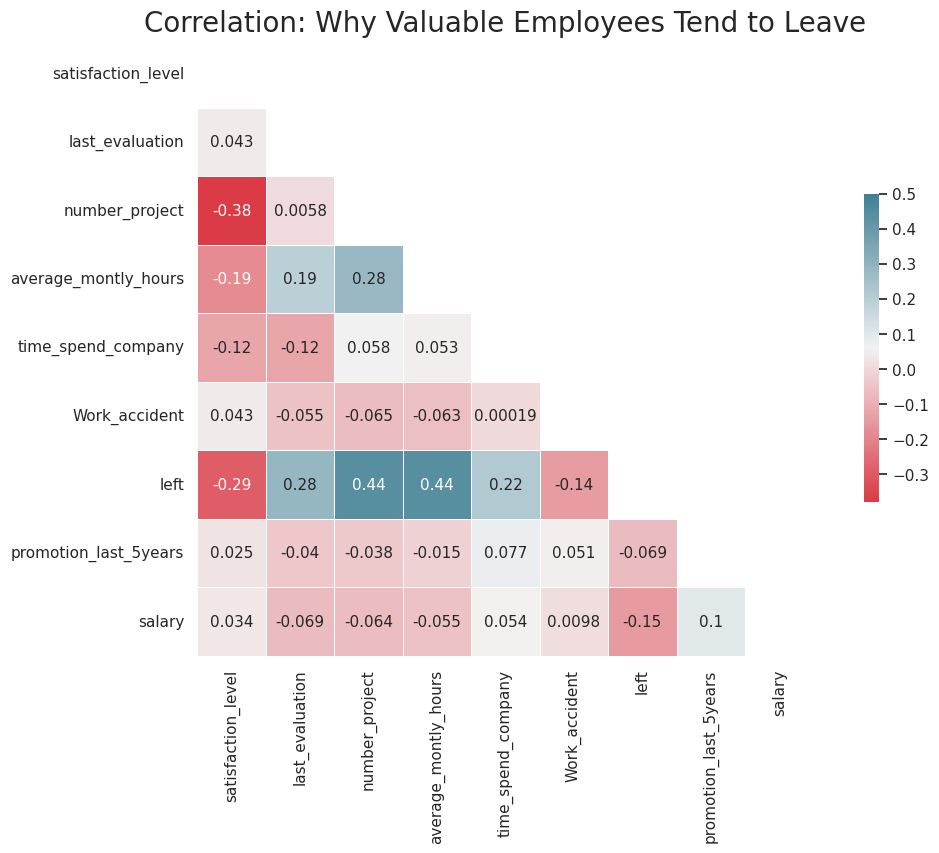

In [ ]:
func_living = data[(data.last_evaluation >= 0.70) | (data.time_spend_company >=4) | (data.number_project >= 5)]

corr2 = func_living.corr()

sns.set(style='white')

mask = np.zeros_like(corr2, dtype=np.bool)

mask[np.triu_indices_from(mask)] = True

# Insert the graphic
f, ax = plt.subplots(figsize=(13,8))

cmap = sns.diverging_palette(10,220, as_cmap=True)

#Draw heat map mask
ax = sns.heatmap(corr2, mask=mask, cmap=cmap, vmax= .5, annot=True, annot_kws= {'size':11}, square=True, xticklabels=True, yticklabels=True, linewidths=.5,
           cbar_kws={'shrink': .5}, ax=ax)
ax.set_title('Correlation: Why Valuable Employees Tend to Leave', fontsize=20);

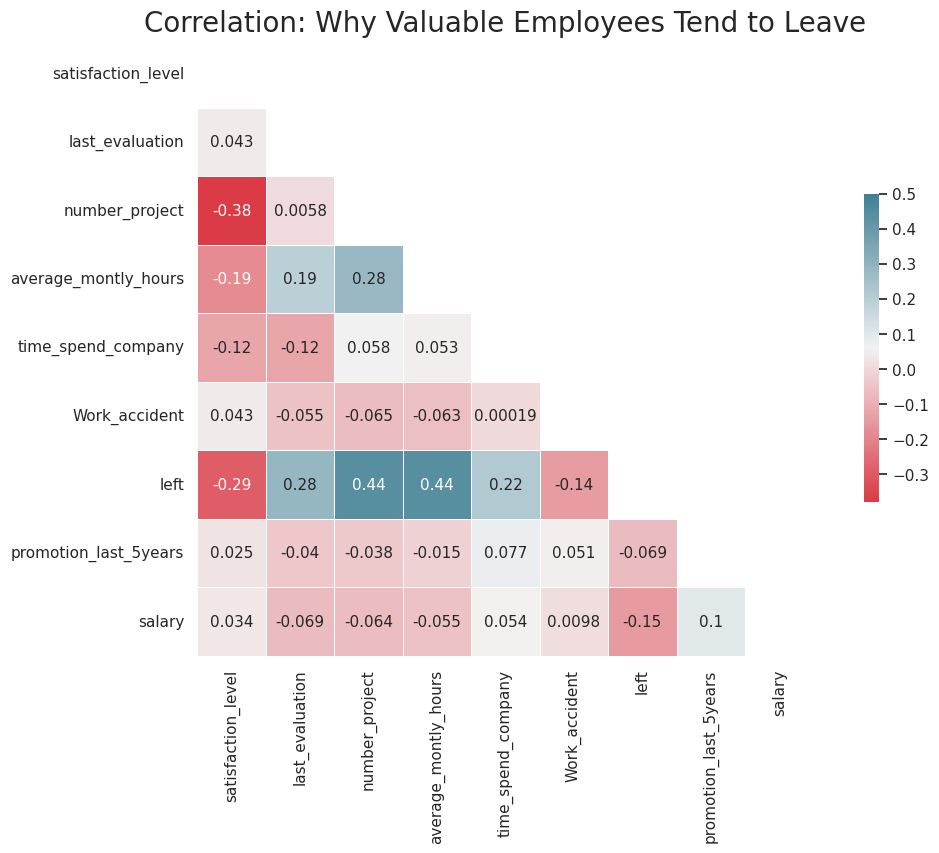

In [ ]:
func_living = data[(data.last_evaluation >= 0.70) | (data.time_spend_company >= 4) | (data.number_project >= 5)]

corr2 = func_living.corr(numeric_only=True)

sns.set(style='white')

mask = np.zeros_like(corr2, dtype=bool)

mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(13, 8))

cmap = sns.diverging_palette(10, 220, as_cmap=True)

ax = sns.heatmap(corr2, mask=mask, cmap=cmap, vmax=0.5, annot=True, annot_kws={'size': 11}, square=True, xticklabels=True, yticklabels=True, linewidths=0.5,
                 cbar_kws={'shrink': 0.5}, ax=ax)
ax.set_title('Correlation: Why Valuable Employees Tend to Leave', fontsize=20)
plt.show()


### Summary of the Exploratory Data Analysis

* It is a relatively young company, on average, employees have 3 or 4 years in the company and the oldest employees are working 10 years.
* The biggest difference in the salary from who stayed and those who left, was found in the managemnet department, in the others departments although the salaries of who stayed be higher in average, it is not a big difference.
* The number of employees that had a work accident is about 14%, of which only 169 employees left the company, so don't seem to have a correlation with the employees leaving.
* In five years only 2% of the employees were promoted. Is possible that many employees get unmotivated and start planning to leave.
* Employees with 7 or longer in the company didn't leave. Employees with 5 years have more chances to leaving.
* There are 2 distincts groups of employees performance that left. A group with poor performance with 2 projects and others with high performance with 5 or more projects. It is not necessary retain all the employees, the focus is on keeping employees with high performance.
* The employees with 4 years in the company have the lowest average satisfaction level of all the company with (0.47).
* The satisfaction drops when the employees are working in 5 or more projects. A number of 3 or 4 projects seems to be ideal independent of the time spend in the company.
* The employees with 5 or more projects that left also worked at least 20% more hours than the average of the company.
* The satisfaction level of the employees that left is grouped in totally disappointed, below the average satisfaction and satisfied.


It seems like there are several factors contributing to why some employees are leaving the company:

1. **Low Average Tenure**: The average tenure in the company is relatively low, indicating a potentially high turnover rate.

2. **Salary Disparity**: There's a significant difference in salary between those who stayed and those who left, particularly in the management department. This could suggest dissatisfaction with compensation.

3. **Work Accidents**: Despite a relatively low percentage of employees experiencing work accidents, a portion of those who left had experienced such accidents. However, this doesn't seem to be a major factor in employees leaving.

4. **Low Promotion Rate**: The low rate of employee promotions could lead to demotivation and increased turnover intentions.

5. **Tenure and Turnover**: Employees with shorter tenures, particularly around 5 years, have a higher likelihood of leaving.

6. **Project Performance**: Employees leaving are grouped into two distinct performance categories: those with low performance (fewer projects) and those with high performance (more projects). The focus should be on retaining high-performing employees.

7. **Satisfaction Levels**: There's a correlation between satisfaction levels and project workload. Satisfaction tends to drop with an increase in the number of projects.

8. **Work Hours**: Employees leaving after working on 5 or more projects also worked significantly more hours than the company average, indicating potential burnout.

9. **Satisfaction Classification**: The satisfaction levels of employees leaving are categorized as "totally disappointed," "below average satisfaction," and "satisfied," suggesting varying levels of dissatisfaction.

Based on these factors, it's evident that a combination of compensation, career advancement opportunities, workload management, and overall job satisfaction play significant roles in employee retention. Addressing these factors through measures such as salary adjustments, career development programs, workload management strategies, and employee engagement initiatives could help improve retention rates and overall employee satisfaction.